In [1]:
from google.colab import drive
drive.mount('/content/drive')
directory_path = '/content/drive/My Drive/CS4610/FinalProject/'

Mounted at /content/drive


Given an RGB image, convert the image into a binary image, retaining all essential features.

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rgb_to_binary(image_path, blur_kernel=(5, 5), canny_thresholds=(50, 150)):
    """
    Converts an RGB image into a binary image, retaining all essential features.
    0s represent background,
    1s represent edges.

    Parameters:
        image_path (str): Path to the input RGB image.
        blur_kernel (tuple): Kernel size for Gaussian blur (default: (5,5)).
        canny_thresholds (tuple): Min and max thresholds for Canny edge detection (default: (50,150)).

    Returns:
        binary_image (numpy.ndarray): 2D binary image with values 0 (background) and 1 (edges).
    """

    # 1. Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 2. Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # 3. Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, blur_kernel, 0)

    # 4. Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_thresholds[0], canny_thresholds[1])

    # 5. yield binary image
    binary_image = (edges > 0).astype(np.uint8)

    return binary_image

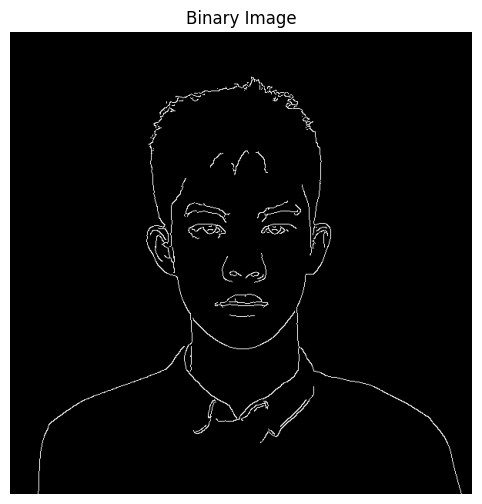

In [4]:
image_path = os.path.join(directory_path, 'my_picture.jpg')
binary_result = rgb_to_binary(image_path)

# Display the binary image
plt.figure(figsize=(8, 6))
"""
Specify 'cmap='gray''
so that the result will be portrayed in black and white.
"""
plt.imshow(binary_result, cmap='gray')
plt.axis('off')  # Hide axes
plt.title("Binary Image")
plt.show()

In [5]:
print(binary_result.shape)

(600, 600)


In [6]:
print(binary_result[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Note.
0s represent background, while 1s represent edges.

plt.imshow portrays 0s are black, while 1s as white, please note that.

March 3rd, 2025. Continue with path planning, using the binary image obtained above.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import networkx as nx

# Step 1:
Extracting edge points from binary image.

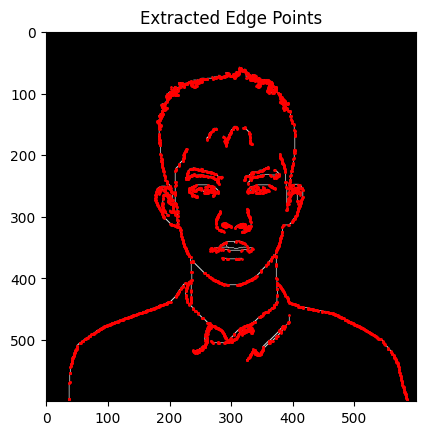

In [8]:
# Extract contours from the binary image.
contours, _ = cv2.findContours(binary_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert into a list of (x, y) edge points.
edge_points = [tuple(pt[0]) for contour in contours for pt in contour]

# Visualize the edge points.
plt.imshow(binary_result, cmap='gray')
x, y = zip(*edge_points)
plt.scatter(x, y, color='r', s=1)  # Mark edge points
plt.title("Extracted Edge Points")
plt.show()

In [9]:
print(len(edge_points))

3768


In [10]:
# /.

# Step 2:
From the collection of edge points, obtain a collection of sampled points.

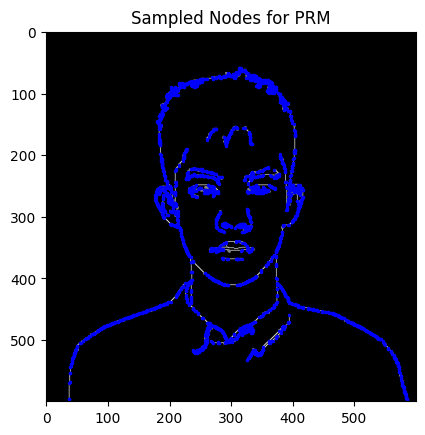

In [11]:
import random

# For keeping the roadmap computationally feasible,
# set the number of sampled nodes.
num_samples = min(3000, len(edge_points)) # You can replace '1000' with other values, as you see fit.
sampled_nodes = random.sample(edge_points, num_samples)

# Visualize sampled nodes
plt.imshow(binary_result, cmap='gray')
x, y = zip(*edge_points)
plt.scatter(x, y, color='gray', s=1)
x_s, y_s = zip(*sampled_nodes)
plt.scatter(x_s, y_s, color='b', s=2)  # Sampled nodes in blue
plt.title("Sampled Nodes for PRM")
plt.show()

You may ignore the cell below:

In [12]:
"""
k = 3  # Number of nearest neighbors, you can adjust this value as you see fit.

# Build KDTree for fast nearest-neighbor search
tree = KDTree(sampled_nodes)

# Create PRM graph
graph = nx.Graph()

# Add nodes
for pt in sampled_nodes:
    graph.add_node(pt)

# Add edges based on nearest neighbors
for pt in sampled_nodes:
    distances, indices = tree.query(pt, k=k+1)  # k+1, because the first is the point itself.
    for i in range(1, len(indices)):  # index 0 is the point itself.
        neighbor = sampled_nodes[indices[i]]
        graph.add_edge(pt, neighbor, weight=distances[i])

# Visualize PRM Graph
plt.imshow(binary_result, cmap='gray')
x_s, y_s = zip(*sampled_nodes)
plt.scatter(x_s, y_s, color='b', s=2)

for edge in graph.edges():
    p1, p2 = edge # Extract the two points from the edge.
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-', linewidth=1)

plt.title("PRM Graph")
plt.show()
"""

'\nk = 3  # Number of nearest neighbors, you can adjust this value as you see fit.\n\n# Build KDTree for fast nearest-neighbor search\ntree = KDTree(sampled_nodes)\n\n# Create PRM graph\ngraph = nx.Graph()\n\n# Add nodes\nfor pt in sampled_nodes:\n    graph.add_node(pt)\n\n# Add edges based on nearest neighbors\nfor pt in sampled_nodes:\n    distances, indices = tree.query(pt, k=k+1)  # k+1, because the first is the point itself.\n    for i in range(1, len(indices)):  # index 0 is the point itself.\n        neighbor = sampled_nodes[indices[i]]\n        graph.add_edge(pt, neighbor, weight=distances[i])\n\n# Visualize PRM Graph\nplt.imshow(binary_result, cmap=\'gray\')\nx_s, y_s = zip(*sampled_nodes)\nplt.scatter(x_s, y_s, color=\'b\', s=2)\n\nfor edge in graph.edges():\n    p1, p2 = edge # Extract the two points from the edge.\n    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], \'g-\', linewidth=1)\n\nplt.title("PRM Graph")\nplt.show()\n'

In [13]:
# /.

# Step 3:
From the collection of sampled points, detect clusters using DBSCAN

<ipython-input-14-3e8becd06e02>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("hsv", len(clusters))  # Generates unique color for each cluster


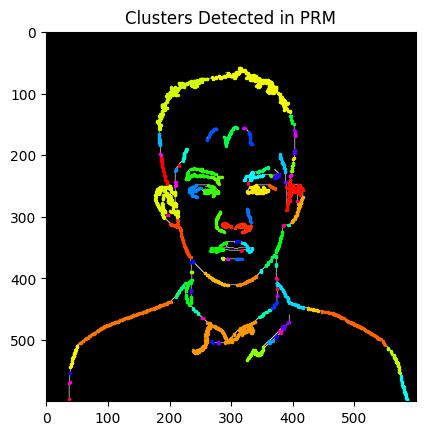

In [14]:
from sklearn.cluster import DBSCAN

# Convert sampled nodes to NumPy array
node_array = np.array(sampled_nodes)

# Apply DBSCAN clustering
eps = 5  # Max distance between points in a cluster
min_samples = 2  # Minimum number of points to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples).fit(node_array)

# Assign cluster labels
cluster_labels = db.labels_  # -1 means noise (not part of any cluster)

# Organize nodes by cluster
clusters = {}
for point, label in zip(sampled_nodes, cluster_labels):
    if label != -1:  # Ignore noise
        clusters.setdefault(label, []).append(point)

# Visualize clusters
plt.imshow(binary_result, cmap='gray')
colors = plt.cm.get_cmap("hsv", len(clusters))  # Generates unique color for each cluster
for label, cluster_points in clusters.items():
    x_c, y_c = zip(*cluster_points)
    plt.scatter(x_c, y_c, color=colors(label), s=2, label=f"Cluster {label}")

# plt.legend()
plt.title("Clusters Detected in PRM")
plt.show()

In [15]:
print(len(clusters))

91


In [16]:
# /.

# Step 4:
Draw inside of each cluster.

In [36]:
from scipy.spatial.distance import pdist, squareform
from itertools import permutations

In [37]:
def tsp_nearest_neighbor(points):
    """Solve TSP using a nearest neighbor heuristic."""
    if len(points) < 2:
        return points

    # Convert NumPy arrays to tuples for hashing
    points = [tuple(p) for p in points]

    path = [points[0]] # The path starts with the first point.
    remaining = set(points[1:])

    while remaining:
        last = path[-1]
        nearest = min(remaining, key=lambda p: np.linalg.norm(np.array(last) - np.array(p)))
        path.append(nearest)
        remaining.remove(nearest)

    return path

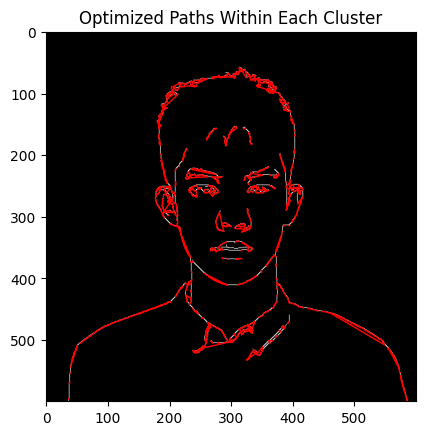

In [38]:
# Compute TSP paths for each cluster
cluster_paths = {}
for label, cluster_points in clusters.items():
    cluster_paths[label] = tsp_nearest_neighbor(cluster_points)

# Visualize Cluster Paths
plt.imshow(binary_result, cmap='gray')
for label, path in cluster_paths.items():
    x_p, y_p = zip(*path)
    plt.plot(x_p, y_p, 'red', linewidth=1, label=f"Cluster {label}")

# plt.legend()
plt.title("Optimized Paths Within Each Cluster")
plt.show()

March 4th attempt, in path smoothing.

In [39]:
sum_of_nodes_in_paths = 0
for path in cluster_paths.values():
  sum_of_nodes_in_paths += len(path)
print(sum_of_nodes_in_paths)

2389


In [40]:
from scipy.spatial.distance import euclidean
import numpy as np

In [41]:
def perpendicular_distance(point, start, end):
    """Compute the perpendicular distance from a point to a line segment (start-end)."""
    if start == end:
        return euclidean(point, start)

    x0, y0 = point
    x1, y1 = start
    x2, y2 = end

    num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    den = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
    return num / den

In [42]:
def douglas_peucker(points, epsilon):
    """Simplify the path using the Douglas-Peucker algorithm."""
    if len(points) < 3:
        return points  # No need to simplify if only two points

    start, end = points[0], points[-1]
    max_dist = 0
    index = 0

    # Find the point with the maximum distance from the line (start-end)
    for i in range(1, len(points) - 1):
        dist = perpendicular_distance(points[i], start, end)
        if dist > max_dist:
            max_dist = dist
            index = i

    # If max distance is greater than epsilon, keep that point and recursively simplify
    if max_dist > epsilon:
        left = douglas_peucker(points[:index+1], epsilon)
        right = douglas_peucker(points[index:], epsilon)
        return left[:-1] + right  # Merge both parts, removing duplicate middle point

    else:
        return [start, end]  # Remove all points except endpoints if deviation is small

In [43]:
# Apply the Douglas-Peucker algorithm to each cluster path
epsilon = 1.5  # Adjust epsilon for more/less simplification
cluster_paths = {label: douglas_peucker(path, epsilon) for label, path in cluster_paths.items()}

In [44]:
sum_of_nodes_in_paths = 0
for path in cluster_paths.values():
  sum_of_nodes_in_paths += len(path)
print(sum_of_nodes_in_paths)

590


In [45]:
# March 4th attempt, in path smoothing, needs to be re-checked.

# Step 5:
Lift up the pen, when transitting between clusters.

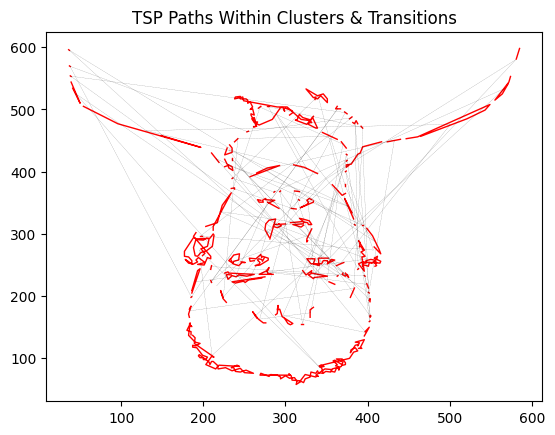

In [46]:
from scipy.spatial import distance

# Compute centroids of each cluster
cluster_centroids = {label: np.mean(points, axis=0) for label, points in clusters.items()}

# Visualize clusters and paths
# plt.imshow(binary_result, cmap='gray')

# Plot paths within clusters
for label, path in cluster_paths.items():
    x_p, y_p = zip(*path)
    plt.plot(x_p, y_p, 'red', linewidth=1, label=f"Cluster {label}")

# Draw dashed lines between cluster centroids to indicate inter-cluster transitions
# (i.e. lifting up the pen when the robot arm is moving between clusters)
labels = list(cluster_centroids.keys())
for i in range(len(labels) - 1):
    start, end = cluster_centroids[labels[i]], cluster_centroids[labels[i + 1]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'k--', linewidth=0.1)  # Dashed line for cluster transitions

plt.title("TSP Paths Within Clusters & Transitions")
plt.show()

In [47]:
# /.

# Step 5, extension:
Find an efficient path. That if you follow the path, you will traverse all clusters within the space.

Treat each cluster as a point in a graph, that reduces to find a path which traverse all points within the graph.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment

# Solve TSP using a heuristic approach
from scipy.spatial import distance
from itertools import permutations

In [49]:
!pip install networkx

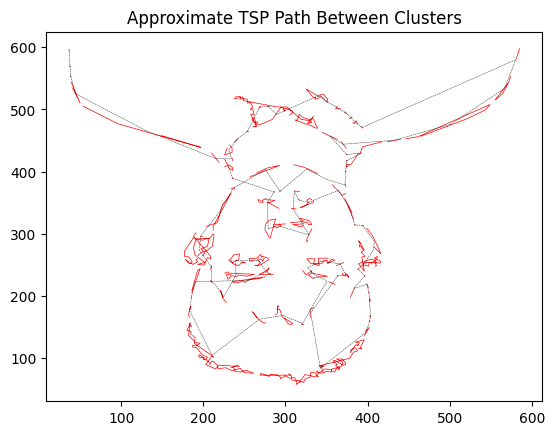

In [50]:
# Step 1: Prepare Data
centroids = np.array(list(cluster_centroids.values()))  # Cluster centroids
labels = list(cluster_centroids.keys())  # Cluster labels

# Step 2: Construct a Graph
G = nx.Graph()

# Add nodes (each centroid is a node)
for i, label in enumerate(labels):
    G.add_node(i, pos=centroids[i])  # Assign centroid position

# Compute pairwise Euclidean distances
dist_matrix = distance_matrix(centroids, centroids)

# Add weighted edges
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        weight = dist_matrix[i, j]
        G.add_edge(i, j, weight=weight)

# Step 3: Solve TSP using NetworkX approximation
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=False)

# Plot intra-cluster paths (red)
for label, path in cluster_paths.items():
    x_p, y_p = zip(*path)
    plt.plot(x_p, y_p, 'red', linewidth=0.5, label=f"Cluster {label}")

# Plot TSP path between clusters (blue)
for i in range(len(tsp_path) - 1):
    start, end = centroids[tsp_path[i]], centroids[tsp_path[i + 1]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'k--', linewidth=0.3)

plt.title("Approximate TSP Path Between Clusters")
plt.show()

In [51]:
# /.

In [52]:
print(len(clusters))

91


In [53]:
print(len(tsp_path))

91
